# Ultimate Data Challange
## Michael Trent
The Purpose of this notebook is to perform some EDA on the Ulitmate Data Science Challenge Data Set


In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score as cv
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [312]:
logs = pd.read_json('Data/logins.json')

In [313]:
logs.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [314]:
logs.shape

(93142, 1)

In [315]:
logs['time_counter'] = logs.login_time.apply(lambda x: str(x).split()[0])

In [316]:
logs.set_index('login_time', inplace = True)

In [317]:
log = logs.resample('15min').count()

In [318]:
log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   time_counter  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [319]:
log.head()

,time_counter
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


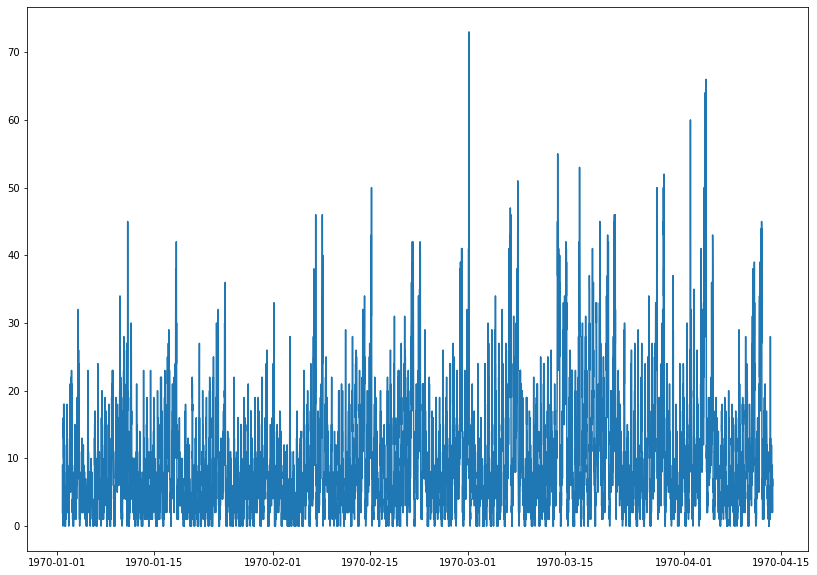

In [320]:
plt.figure(figsize = (14, 10))
plt.plot(log)

In [321]:
percent_change = log.pct_change()

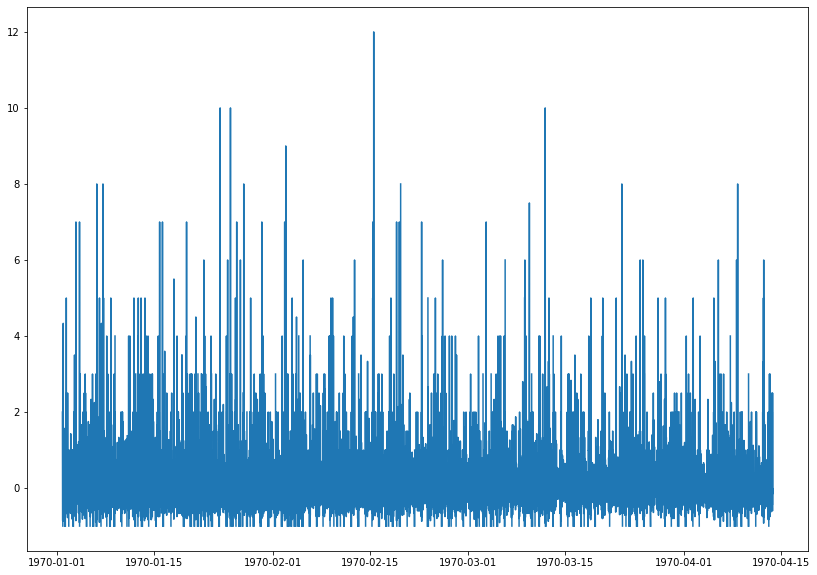

In [322]:
plt.figure(figsize = (14, 10))
plt.plot(percent_change)

In [323]:
diff = log.diff().dropna()

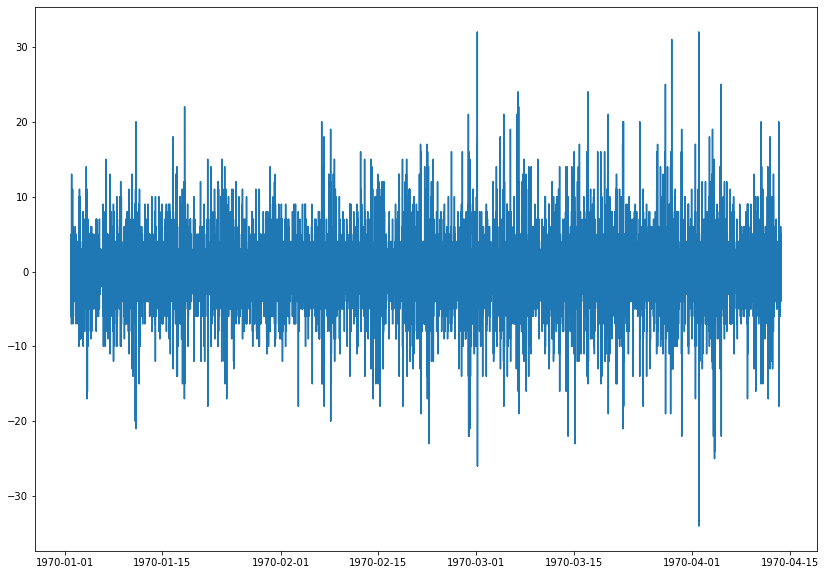

In [324]:
plt.figure(figsize = (14, 10))
plt.plot(diff)

In [325]:
autoCorr = log['time_counter'].autocorr()

In [326]:
from statsmodels.graphics.tsaplots import plot_pacf

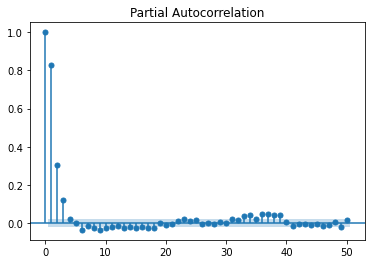

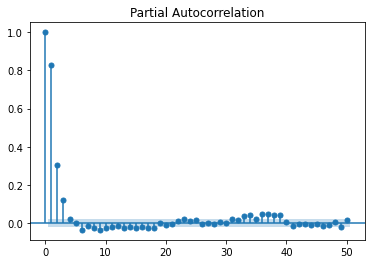

In [327]:
plot_pacf(log['time_counter'], lags = 50, alpha = 0.05)

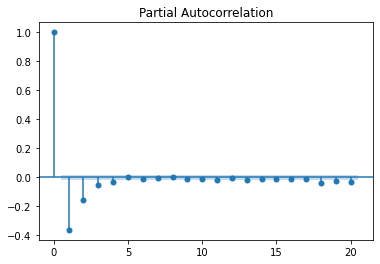

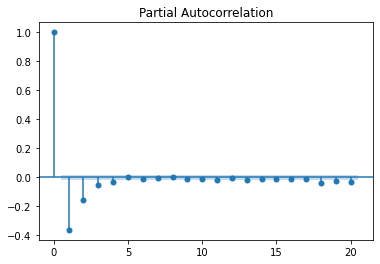

In [328]:
plot_pacf(diff, lags = 20, alpha = 0.05)

In [329]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff, order=(3, 0))
result = model.fit()
#result.plot_predict(start = '')

Text(0.5, 0, 'AR Order')

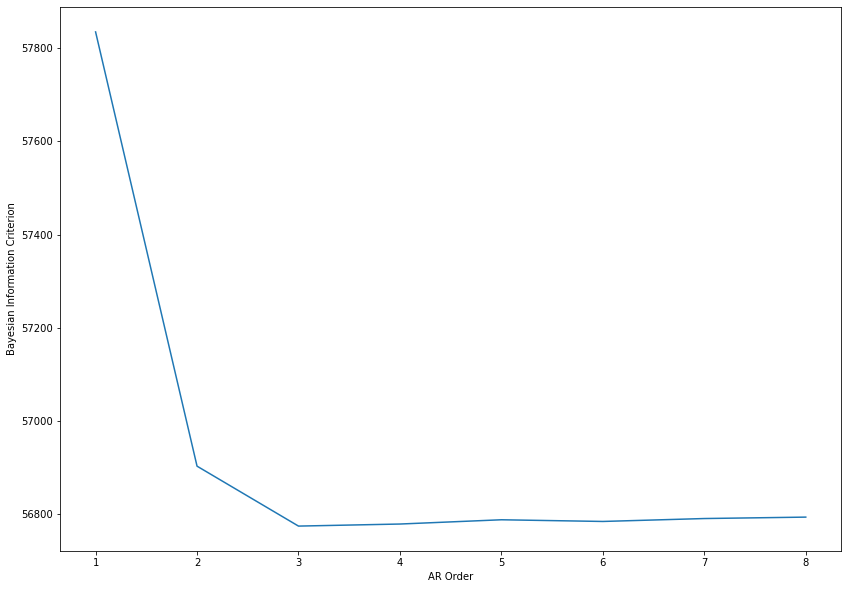

In [330]:
phis = [1, 2, 3, 4, 5, 6, 7, 8]
bics = []
for phi in phis:
    model = ARMA(log['time_counter'], order = (phi,0))
    result = model.fit()
    bics.append(result.bic)

plt.figure(figsize = (14, 10))
plt.plot(phis, bics)
plt.ylabel('Bayesian Information Criterion')
plt.xlabel('AR Order')

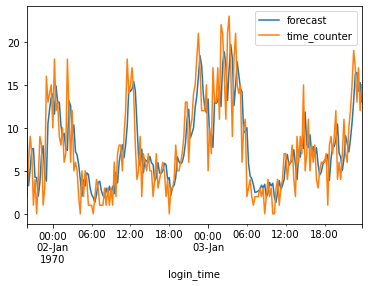

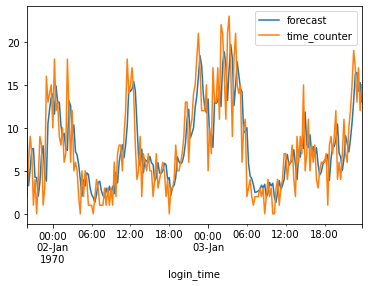

In [331]:
model = ARMA(log['time_counter'], order = (3, 0))
result = model.fit()
result.plot_predict(start = '1970-01-01', end = '1970-01-03')

In [332]:
log.head()

,time_counter
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [333]:
rides = pd.read_json('Data/ultimate_data_challenge.json')

In [334]:
rides.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [335]:
rides.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [336]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [337]:
rides.signup_date = pd.to_datetime(rides.signup_date)

In [338]:
rides.last_trip_date = pd.to_datetime(rides.last_trip_date)

In [339]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [340]:
max(rides.last_trip_date)

Timestamp('2014-07-01 00:00:00')

In [341]:
max(rides.trips_in_first_30_days)

125

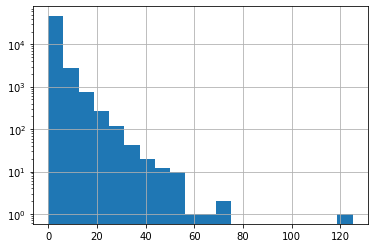

In [342]:
rides.trips_in_first_30_days.hist(bins = 20)
plt.yscale('log')

<AxesSubplot:xlabel='trips_in_first_30_days'>

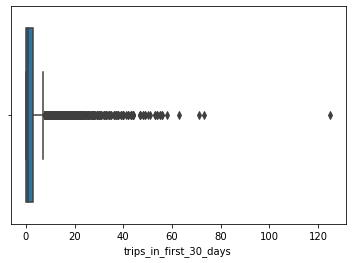

In [343]:
sns.boxplot(rides.trips_in_first_30_days)

<AxesSubplot:>

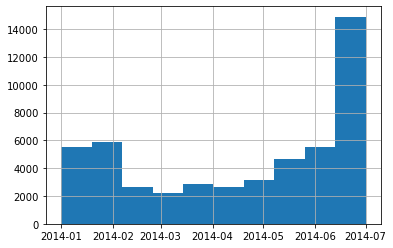

In [344]:
rides.last_trip_date.hist()

In [345]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [346]:
rides.avg_rating_of_driver.fillna(rides.avg_rating_of_driver.mean(), inplace = True)
rides.avg_rating_by_driver.fillna(rides.avg_rating_by_driver.mean(), inplace = True)
rides.dropna(inplace = True)
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [347]:
#Now we need to generate a feature to differentiate between customers who were retained
retained = rides.last_trip_date.apply(lambda x: 1 if x > pd.to_datetime('2014-06-01 00:00:00') else 0)

In [348]:
rides.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601482,1.074991,8.875314,60.883832,5.785418,4.777862
std,3.793300,0.565227,0.222666,19.989018,37.086239,5.669709,0.446220
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [357]:
x_train, x_test, y_train, y_test = train_test_split(rides, retained)

In [358]:
obs = []
_ = [obs.append(col) for col in x_train.columns if x_train[col].dtype == 'O']
x_train_cat = pd.get_dummies(x_train[obs])
x_train.drop(obs, axis = 1, inplace = True)
x_test_cat = pd.get_dummies(x_test[obs])
x_test.drop(obs, axis = 1, inplace = True)
x_train = pd.concat([x_train.reset_index(drop=True), x_train_cat.reset_index(drop=True)], axis = 1)
x_test = pd.concat([x_test.reset_index(drop=True), x_test_cat.reset_index(drop=True)], axis = 1)

In [351]:
x_train.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0,2014-01-24,4.000000,1.00,2014-03-15,0.0,True,100.0,5.98,4.3,0,0,1,1,0
1,0,2014-01-18,4.601559,1.75,2014-02-22,100.0,False,0.0,4.38,5.0,1,0,0,1,0
2,0,2014-01-11,5.000000,2.75,2014-04-06,100.0,False,0.0,4.98,5.0,1,0,0,1,0
3,1,2014-01-05,4.601559,1.25,2014-01-05,100.0,False,0.0,2.13,5.0,1,0,0,0,1
4,0,2014-01-15,5.000000,1.00,2014-06-29,0.0,True,50.0,2.77,4.7,1,0,0,0,1


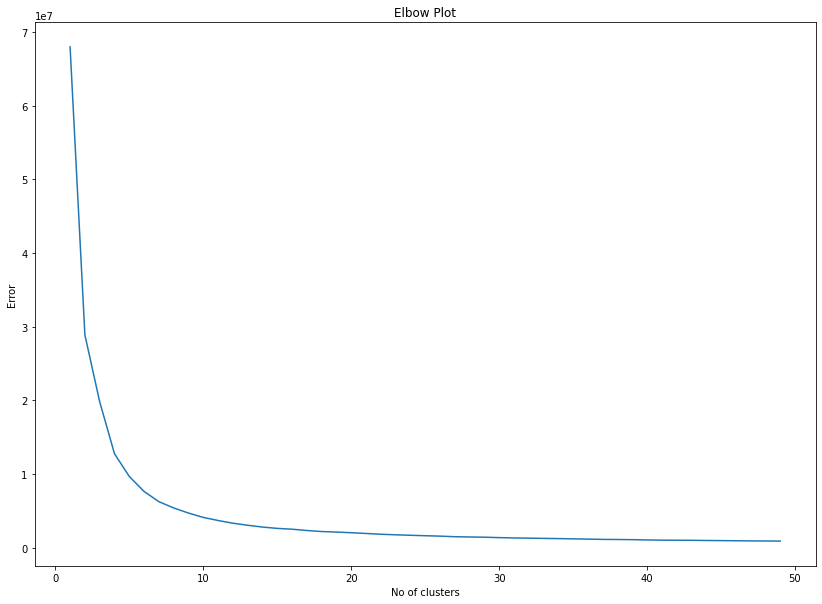

In [359]:
Error = []
x_train.drop(['signup_date', 'last_trip_date'], axis = 1, inplace = True)
x_test.drop(['signup_date', 'last_trip_date'], axis = 1, inplace = True)
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_train)
    Error.append(kmeans.inertia_)
_ = plt.figure(figsize = (14, 10))
_ = plt.plot(range(1, 50), Error)
_ = plt.title('Elbow Plot')
_ = plt.xlabel('No of clusters')
_ = plt.ylabel('Error')
_ = plt.show()

In [360]:
x_train.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [361]:
x_test.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [363]:
kMeans = KMeans(n_clusters = 5)
kMeans.fit(x_train)
clusters = kMeans.predict(x_test)
x_test['clusters'] = clusters
clusters = kmeans.predict(x_train)
x_train['clusters'] = clusters

ROC AUC: 0.6340978721482982


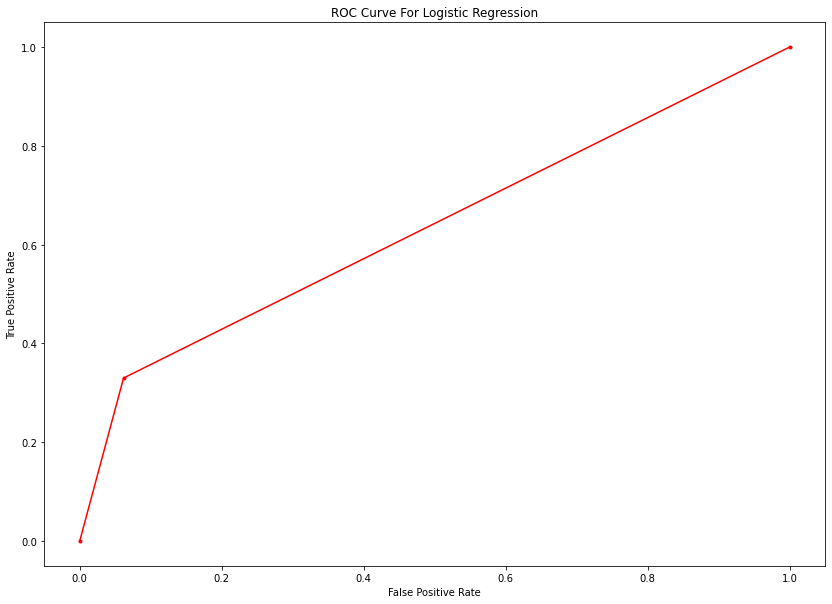

In [382]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
lm = LogisticRegression()
lm.fit(x_train, y_train)
preds = lm.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
print('ROC AUC:', roc_auc_score(y_test, preds))
plt.figure(figsize=(14, 10))
plt.plot(fpr, tpr, marker = '.', c = 'r')
_ = plt.title('ROC Curve For Logistic Regression')
_ = plt.ylabel('True Positive Rate')
_ = plt.xlabel('False Positive Rate')

ROC AUC: 0.7604812477758051


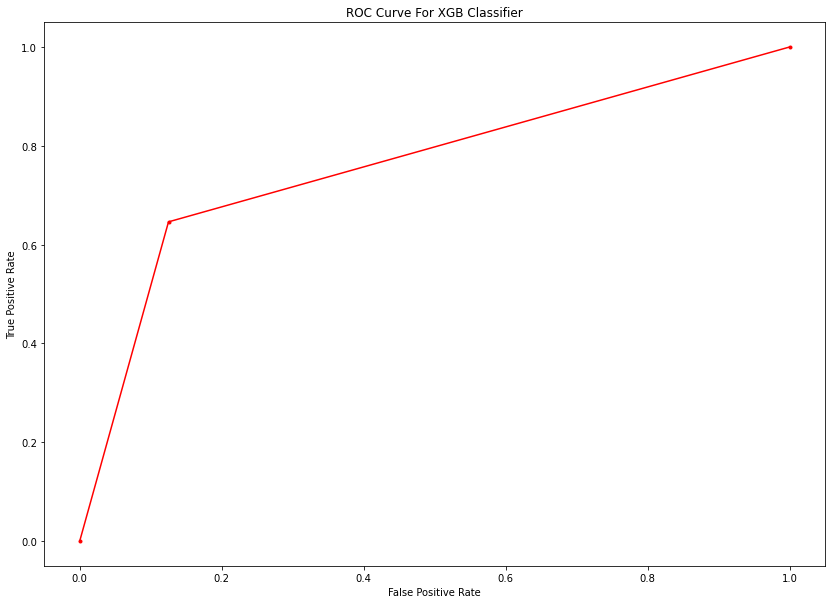

In [383]:
XGBModel = XGBClassifier()
XGBModel.fit(x_train, y_train)
preds = XGBModel.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
print('ROC AUC:', roc_auc_score(y_test, preds))
plt.figure(figsize=(14, 10))
plt.plot(fpr, tpr, marker = '.', c = 'r')
_ = plt.title('ROC Curve For XGB Classifier')
_ = plt.ylabel('True Positive Rate')
_ = plt.xlabel('False Positive Rate')

In [384]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)

# Define the Bayesian function. This basically just comes down to defining the hyperparameters you want to tune then throwing 
# the parameters into a k-fold cross validation class and returning the scoring parameter - here I use rmse. 

def bayes_tune_xgb(max_depth, gamma, n_estimators, learning_rate, subsample):
    params = {'max_depth': int(max_depth),
             'gamma': gamma, 
             'n_esitmators': int(n_estimators),
             'learning_rate': learning_rate,
             'subsample': subsample,
             'eta':0.1,
             'eval_metric': 'rmse', 
             'objective' : 'reg:squarederror'}

    cv_result = xgb.cv(params, dtrain, num_boost_round = 70, nfold = 5)
    return -1*cv_result['test-rmse-mean'].iloc[-1]

# Now I need to instanciate the Bayesian Optimizer with the function and the hyperparameters I want to optimize
# as well as the feature space I want to explore for each hyperparameter. 

xgb_bo = BayesianOptimization(bayes_tune_xgb, {'max_depth': (2, 10),
                                             'gamma': (0,1),
                                             'learning_rate': (0,1),
                                             'n_estimators': (75, 120),
                                             'subsample' : (0.25, 1)
                                             })

# Now lets get to optimizing. The function will run for a total of n_iter + init_points iterations (here it's 30)

xgb_bo.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.4073   |  0.1167   |  0.0336   |  2.796    |  95.89    |  0.7695   |
|  2        | -0.4068   |  0.4395   |  0.5858   |  5.344    |  111.5    |  0.4135   |
|  3        | -0.407    |  0.2391   |  0.2267   |  8.822    |  114.7    |  0.2512   |
|  4        | -0.4278   |  0.3767   |  0.5024   |  6.701    |  97.98    |  0.2518   |
|  5        | -0.4298   |  0.2917   |  0.6892   |  8.54     |  108.5    |  0.8237   |
|  6        | -0.4122   |  0.8411   |  0.5671   |  8.749    |  94.22    |  0.5381   |
|  7        | -0.3863   |  0.7734   |  0.4845   |  2.671    |  84.33    |  0.5647   |
|  8        | -0.3809   |  0.8387   |  0.1584   |  5.301    |  91.88    |  0.9196   |
|  9        | -0.3889   |  0.7517   |  0.02447  |  8.459    |  94.12    |  0.4439   |
|  10       | -0.3914   |  0.1076   |  0.08674  |  2.6

In [385]:
#Set the hyperparamters to the best performing parameters. 
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

ROC AUC: 0.8585976123258747


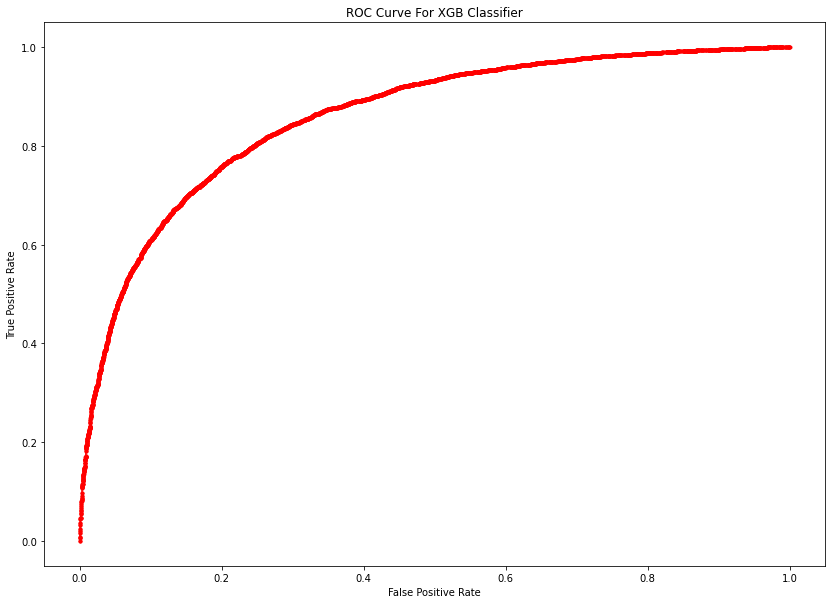

In [386]:
XGBModel = XGBRegressor(**params, objective = 'reg:squarederror')
XGBModel.fit(x_train, y_train)
preds = XGBModel.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
print('ROC AUC:', roc_auc_score(y_test, preds))
plt.figure(figsize=(14, 10))
plt.plot(fpr, tpr, marker = '.', c = 'r')
_ = plt.title('ROC Curve For XGB Classifier')
_ = plt.ylabel('True Positive Rate')
_ = plt.xlabel('False Positive Rate')


In [388]:
def bayes_tune_RF(max_depth, max_features, n_estimators, max_samples):
    params = {'max_depth': int(max_depth),
             'n_estimators': int(n_estimators),
             'max_features': float(max_features),
             'max_samples': float(max_samples)
             }

    cv_result = cv(RandomForestClassifier(**params), X = x_train, y = y_train, error_score = 0)
    return np.nanmean(cv_result)

RF_BO = BayesianOptimization(bayes_tune_RF, {'max_depth': (2, 20),
                                             'max_features': (0.5,1),
                                             'n_estimators': (75, 120),
                                             'max_samples' : (0.25, 0.99)
                                             })

RF_BO.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   | max_depth | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7814   |  7.241    |  0.6994   |  0.6401   |  88.11    |
|  2        |  0.7463   |  3.98     |  0.8298   |  0.6158   |  104.0    |
|  3        |  0.7732   |  5.283    |  0.6499   |  0.4432   |  113.5    |
|  4        |  0.7586   |  3.159    |  0.6576   |  0.9025   |  105.2    |
|  5        |  0.7808   |  18.11    |  0.944    |  0.3659   |  102.8    |
|  6        |  0.7796   |  6.179    |  0.5324   |  0.3744   |  113.2    |
|  7        |  0.7844   |  8.057    |  0.5213   |  0.5507   |  101.4    |
|  8        |  0.7863   |  10.95    |  0.9257   |  0.4338   |  102.8    |
|  9        |  0.7824   |  19.79    |  0.7807   |  0.3462   |  89.97    |
|  10       |  0.735    |  2.628    |  0.6718   |  0.524    |  101.7    |
|  11       |  0.7873   |  10.12    |  0.5      |  0.5839   |  100.7    |
|  12       |  0.7865   |  9.288    | 

In [389]:
params = RF_BO.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

ROC AUC: 0.761551427312679


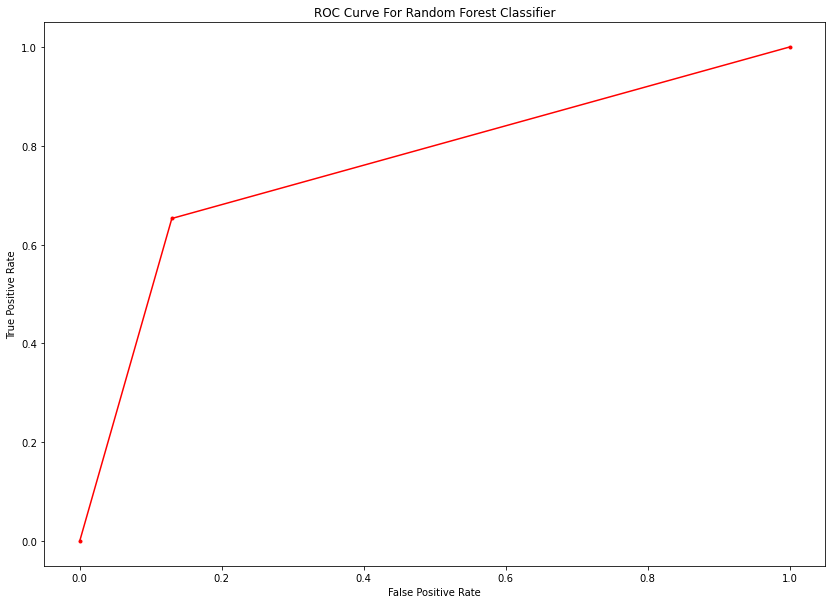

In [391]:
RF1 = RandomForestClassifier(**params)
y_train = np.ravel(y_train)
RF1.fit(x_train, y_train)
preds = RF1.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
print('ROC AUC:', roc_auc_score(y_test, preds))
plt.figure(figsize=(14, 10))
plt.plot(fpr, tpr, marker = '.', c = 'r')
_ = plt.title('ROC Curve For Random Forest Classifier')
_ = plt.ylabel('True Positive Rate')
_ = plt.xlabel('False Positive Rate')